# Framingham Heart Study

## a1

### a1.1 Data Loading

In [3]:
import numpy as np
import pandas as pd
import os
import statsmodels.formula.api as smf

In [4]:
TenYearCHD_train = pd.read_csv("framingham_train_sp24.csv")   #read train_set data
TenYearCHD_train.head()   #first 5 rows

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,63,Some high school,0,0,0,0,1,0,293,193.0,63.0,30.00,70,76,1
1,1,41,High school/GED,1,40,0,0,0,0,310,117.5,80.0,26.74,80,78,0
2,1,58,Some college/vocational school,0,0,0,0,0,0,250,109.0,78.5,25.26,90,83,0
3,1,43,Some high school,1,43,0,0,0,0,215,122.0,76.0,26.84,85,74,0
4,1,46,College,0,0,0,0,1,0,220,136.5,99.5,27.78,80,70,0


In [5]:
TenYearCHD_train   #all rows * columns

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,63,Some high school,0,0,0,0,1,0,293,193.0,63.0,30.00,70,76,1
1,1,41,High school/GED,1,40,0,0,0,0,310,117.5,80.0,26.74,80,78,0
2,1,58,Some college/vocational school,0,0,0,0,0,0,250,109.0,78.5,25.26,90,83,0
3,1,43,Some high school,1,43,0,0,0,0,215,122.0,76.0,26.84,85,74,0
4,1,46,College,0,0,0,0,1,0,220,136.5,99.5,27.78,80,70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,1,55,College,0,0,0,0,0,0,260,120.0,80.0,28.89,60,68,0
2556,0,43,College,0,0,0,0,0,0,240,110.5,66.0,24.09,67,80,0
2557,0,47,Some college/vocational school,0,0,0,0,1,0,219,153.0,98.0,22.02,80,92,0
2558,1,42,High school/GED,0,0,0,0,1,0,249,142.5,90.0,26.14,59,82,0


### a1.2 Logistic Regression Model Fitting

In [10]:
logreg_model_train = smf.logit("TenYearCHD ~ male + age + education + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose", TenYearCHD_train) # set up smf.logit
logreg_train = logreg_model_train.fit() #fit the model
logreg_train.summary()

Optimization terminated successfully.
         Current function value: 0.375973
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2542
Method:                           MLE   Df Model:                           17
Date:                Mon, 07 Oct 2024   Pseudo R-squ.:                  0.1285
Time:                        21:21:53   Log-Likelihood:                -962.49
converged:                       True   LL-Null:                       -1104.4
Covariance Type:            nonrobust   LLR p-value:                 2.367e-50
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      -9.0826      0.842    -10.787      0.000     -10.733      -7.432
education[T.High school/GED]                   -0.1220      0.211     -0.579      0.563      -0.535       0.291
education[T.Some college/vocational school]    -0.0870      0.233     -0.373      0.709      -0.544       0.370
education[T.Some high school]                   0.0519      0.196      0.265      0.791      -0.333       0.437
male                                            0.4217      0.133      3.178      0.001       0.162       0.682
age                                             0.0711      0.008      8.829      0.000       0.055       0.087
currentSmoker                                   0.1506      0.185      0.813      0.416      -0.212       0.514
cigsPerDay                                      0.0250      0.007      3.476      0.001       0.011       0.039
BPMeds                                          0.2873      0.274      1.048      0.295      -0.250       0.824
prevalentStroke                                 0.7975      0.571      1.397      0.162      -0.321       1.916
prevalentHyp                                    0.2215      0.163      1.355      0.175      -0.099       0.542
diabetes                                       -0.0481      0.368     -0.131      0.896      -0.769       0.673
totChol                                         0.0028      0.001      2.048      0.041       0.000       0.005
sysBP                                           0.0092      0.004      2.041      0.041       0.000       0.018
diaBP                                           0.0077      0.008      0.988      0.323      -0.008       0.023
BMI                                             0.0058      0.015      0.382      0.703      -0.024       0.036
heartRate                                      -0.0042      0.005     -0.843      0.399      -0.014       0.006
glucose                                         0.0082      0.003      3.178      0.001       0.003       0.013
===============================================================================================================
"""

### Test Set Performance

In [11]:
TenYearCHD_test = pd.read_csv("framingham_test_sp24.csv")   #read test_set data
TenYearCHD_test.head()   #first 5 rows

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,54,Some high school,0,0,0,0,1,1,326,187.0,95.0,29.94,67,235,0
1,0,47,Some high school,1,20,0,0,1,0,325,160.0,95.0,32.07,95,87,0
2,0,53,High school/GED,1,20,0,0,1,0,256,128.0,90.0,23.65,105,102,0
3,0,55,Some high school,0,0,0,0,1,0,185,140.0,84.0,25.94,78,90,0
4,1,64,Some high school,1,20,0,0,1,0,214,155.0,99.0,22.46,75,82,0


In [12]:
TenYearCHD_test

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,54,Some high school,0,0,0,0,1,1,326,187.0,95.0,29.94,67,235,0
1,0,47,Some high school,1,20,0,0,1,0,325,160.0,95.0,32.07,95,87,0
2,0,53,High school/GED,1,20,0,0,1,0,256,128.0,90.0,23.65,105,102,0
3,0,55,Some high school,0,0,0,0,1,0,185,140.0,84.0,25.94,78,90,0
4,1,64,Some high school,1,20,0,0,1,0,214,155.0,99.0,22.46,75,82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,0,66,High school/GED,0,0,0,0,1,0,238,140.0,80.0,26.69,69,83,0
1094,1,54,College,1,30,0,0,0,0,195,113.5,72.0,21.78,65,67,0
1095,1,62,Some high school,1,20,0,0,1,0,245,158.0,86.5,26.51,90,74,0
1096,1,64,Some high school,0,0,0,0,0,0,296,142.0,84.0,27.01,52,83,1


In [14]:
logreg_model_test = smf.logit("TenYearCHD ~ male + age + education + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose", TenYearCHD_test) # set up smf.logit
logreg_test = logreg_model_test.fit() #fit the model
logreg_test.summary()

Optimization terminated successfully.
         Current function value: 0.364825
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 1098
Model:                          Logit   Df Residuals:                     1080
Method:                           MLE   Df Model:                           17
Date:                Mon, 07 Oct 2024   Pseudo R-squ.:                  0.1214
Time:                        21:30:59   Log-Likelihood:                -400.58
converged:                       True   LL-Null:                       -455.90
Covariance Type:            nonrobust   LLR p-value:                 9.108e-16
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      -6.4653      1.341     -4.820      0.000      -9.094      -3.836
education[T.High school/GED]                   -0.1758      0.342     -0.514      0.607      -0.846       0.494
education[T.Some college/vocational school]    -0.2691      0.388     -0.694      0.487      -1.029       0.490
education[T.Some high school]                   0.1252      0.315      0.398      0.691      -0.492       0.742
male                                            0.7991      0.201      3.966      0.000       0.404       1.194
age                                             0.0435      0.013      3.428      0.001       0.019       0.068
currentSmoker                                   0.0101      0.309      0.033      0.974      -0.596       0.616
cigsPerDay                                     -0.0081      0.014     -0.580      0.562      -0.036       0.019
BPMeds                                         -0.2937      0.486     -0.605      0.545      -1.245       0.658
prevalentStroke                                 0.5075      0.989      0.513      0.608      -1.430       2.445
prevalentHyp                                    0.2226      0.268      0.831      0.406      -0.302       0.748
diabetes                                        0.5637      0.649      0.869      0.385      -0.708       1.836
totChol                                         0.0013      0.002      0.623      0.533      -0.003       0.005
sysBP                                           0.0320      0.008      4.222      0.000       0.017       0.047
diaBP                                          -0.0346      0.012     -2.847      0.004      -0.058      -0.011
BMI                                             0.0038      0.024      0.156      0.876      -0.044       0.051
heartRate                                       0.0003      0.008      0.037      0.970      -0.016       0.016
glucose                                         0.0022      0.005      0.465      0.642      -0.007       0.011
===============================================================================================================
"""

### a1.4 Confusion Matrix Given a Decision Threshold

In [15]:
p = 0.11   #threshold p

In [16]:
y_prob = logreg_train.predict(TenYearCHD_test)   #Traning logistic regression model to predict the testing set

In [17]:
y_pred = pd.Series([1 if x > p else 0 for x in y_prob], index=y_prob.index)   #separate patients by p > 0.11

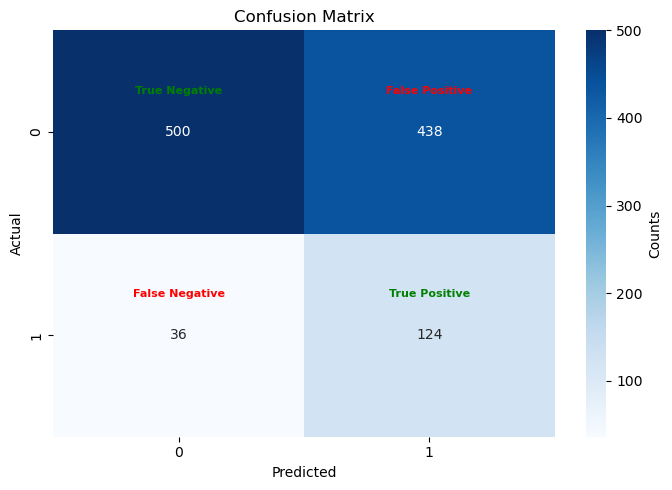

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_test = TenYearCHD_test['TenYearCHD']
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))  #figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Counts'})

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Adjusted positions and font size for better alignment
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
positions = [(0.5, 0.3), (1.5, 0.3), (0.5, 1.3), (1.5, 1.3)]

for pos, label in zip(positions, labels):
    plt.text(pos[0], pos[1], label, 
             horizontalalignment='center', 
             verticalalignment='center', 
             color='green' if 'True' in label else 'red',
             fontsize=8,
             fontweight='bold')

plt.tight_layout()
plt.show()